,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-09 00:00:00-04:00,439.193718,439.932352,435.081272,437.926056,15324200,0.00,0.0
2025-05-12 00:00:00-04:00,445.122814,448.546521,438.974098,448.436737,22821900,0.00,0.0
2025-05-13 00:00:00-04:00,446.959462,449.844181,444.543884,448.316986,23618800,0.00,0.0
2025-05-14 00:00:00-04:00,447.318794,453.068218,447.318794,452.109985,19902800,0.00,0.0
2025-05-15 00:00:00-04:00,450.769989,456.190002,450.429993,453.130005,21992300,0.83,0.0
2025-05-16 00:00:00-04:00,452.049988,454.359985,448.730011,454.269989,23849800,0.00,0.0
2025-05-19 00:00:00-04:00,450.880005,459.589996,450.799988,458.869995,21336500,0.00,0.0
2025-05-20 00:00:00-04:00,455.589996,458.339996,454.320007,458.170013,15441800,0.00,0.0
2025-05-21 00:00:00-04:00,454.570007,457.779999,451.809998,452.570007,19216900,0.00,0.0


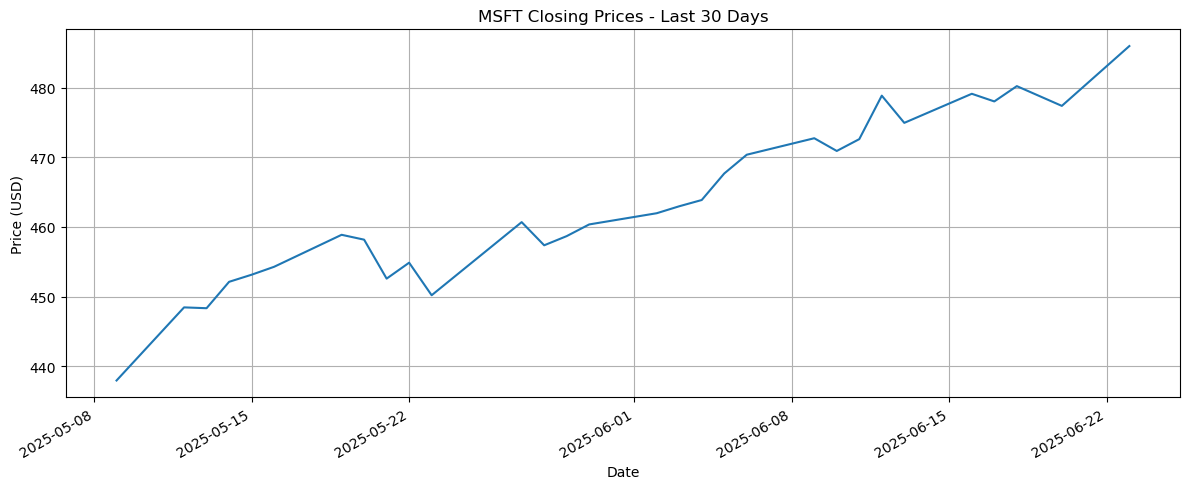

In [2]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Download 30-day historical data for Microsoft
msft = yf.Ticker("MSFT")
hist = msft.history(period="30d")

# Display the data
display(hist)

# Plot the closing prices
hist['Close'].plot(title="MSFT Closing Prices - Last 30 Days", figsize=(12, 5))
plt.grid(True)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()
